*Baseline model*: predict the last value.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def smape(predictions, actual):
    difference = np.abs(predictions-actual)
    summation = np.abs(actual)+np.abs(predictions)
    error = np.mean(2*difference/summation)
    return error

In [3]:
def baseline_predict(train, test):
    train_array = np.asarray(train.tail(1)["t"])
    test_array = np.asarray(test.iloc[:-1, 0])
    
    predictions = np.concatenate([train_array, test_array])

    return predictions

In [4]:
list_of_names = ["linear1_abrupt", "linear2_abrupt", "linear3_abrupt",
                "nonlinear1_abrupt", "nonlinear2_abrupt", "nonlinear3_abrupt",
                "linear1_inc", "linear2_inc", "linear3_inc",
                "nonlinear1_inc", "nonlinear2_inc", "nonlinear3_inc"]
#dictionary to store smape for every dataset
smape_dict = {}

SMAPE: 1.3904


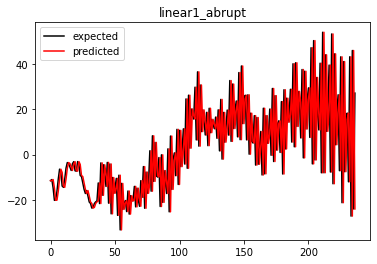

SMAPE: 0.2713


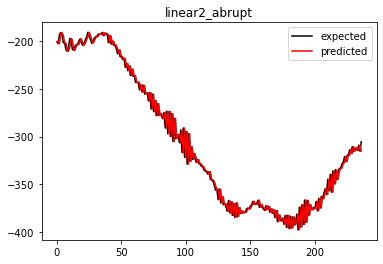

SMAPE: 0.7340


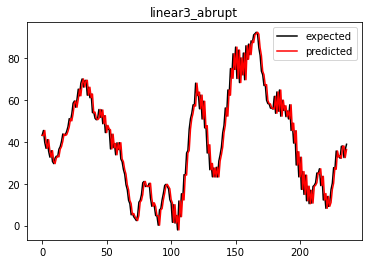

SMAPE: 1.4048


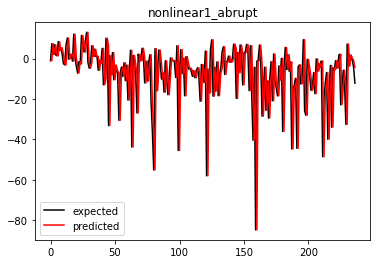

SMAPE: 0.0549


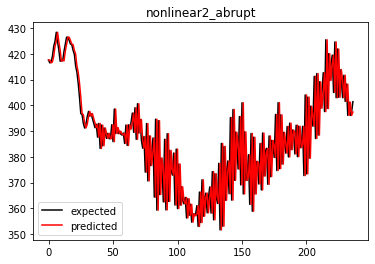

SMAPE: 1.1893


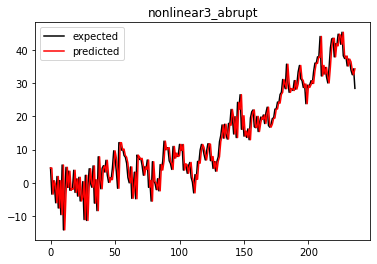

SMAPE: 1.4975


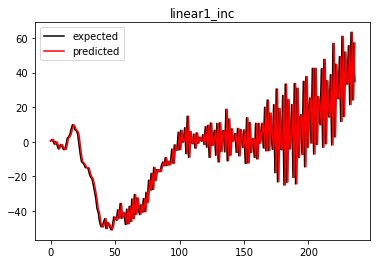

SMAPE: 0.4597


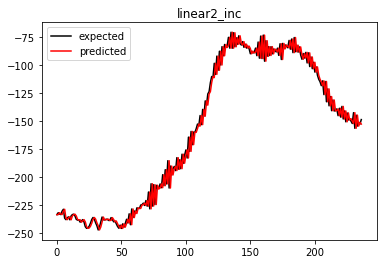

SMAPE: 1.3617


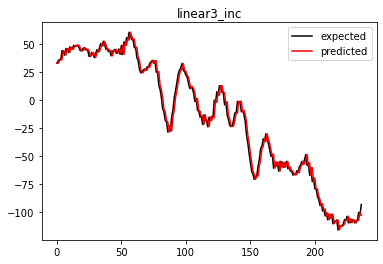

SMAPE: 1.4825


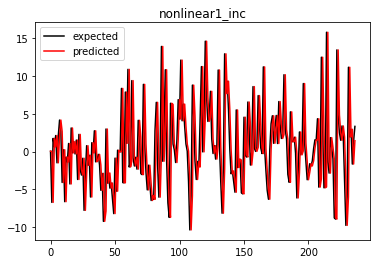

SMAPE: 0.7937


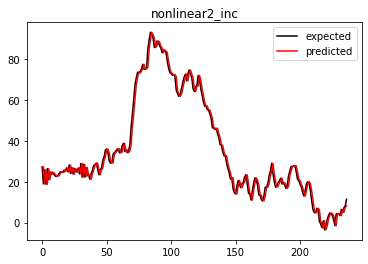

SMAPE: 1.5353


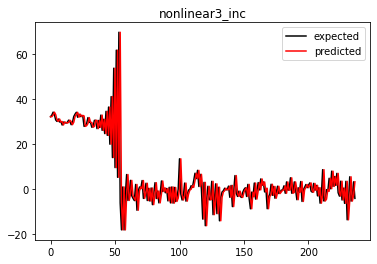

In [5]:
for name in list_of_names:
    file_path = "data/"+name
    data = pd.read_csv(file_path)
    
    split = int(0.7*len(data))
    train, test = data.loc[:split, :], data.loc[split:, :]
    ground_truth = data.loc[int(0.7*len(data)):, "t"].reset_index(drop = True)
    
    predictions = baseline_predict(train, test)
    

    error = smape(predictions, ground_truth.values.reshape([-1,1]))
    smape_dict[name] = error
    print("SMAPE: {:.4f}".format(error))
    
    plt.plot(ground_truth, label = "expected", color = "black")
    plt.plot(predictions, label = "predicted", color = "red")
    plt.title(name)
    plt.legend()    
    plt.show()